# WE_with_DL results

In [53]:
import sys
import os

# To import lib from parent directory
current_dir = os.getcwd()
parent_dir = os.path.abspath( os.path.join(current_dir, "../") )
sys.path.append(parent_dir)

In [54]:
from lib import evaluate
import pandas as pd
import numpy as np

### Specify the result file

In [55]:
result_dir = os.path.join(current_dir, "WE_with_DL/result-20241201024906")
# result_dir = os.path.join(current_dir, "WE_with_DL/1210GS-result-20241211133642")

### Result

In [56]:
result = pd.read_csv(result_dir + "/result.csv")
print(result)

   fold       acc    tn    fp   fn    tp  sensitivity  specificity       mcc  \
0     1  0.662592  1441  1069  670  1974     0.746596     0.574104  0.325965   
1     2  0.644936  1731   870  960  1593     0.623972     0.665513  0.289756   
2     3  0.650369  1384  1168  634  1968     0.756341     0.542320  0.305931   
3     4  0.634194  1352  1283  602  1916     0.760921     0.513093  0.282307   
4     5  0.638075  1406  1180  685  1882     0.733152     0.543697  0.281896   

        auc  
0  0.714148  
1  0.709223  
2  0.715088  
3  0.692141  
4  0.700347  


In [57]:
metrics = {
    "acc": "acc",
    "sn": "sensitivity",
    "sp": "specificity",
    "mcc": "mcc",
    "auc": "auc",
}

print("Performance average:")
for metric in metrics:
    print("%s\t: %.2f" % (metric, result[metrics[metric]].mean()))

Performance average:
acc	: 0.65
sn	: 0.72
sp	: 0.57
mcc	: 0.30
auc	: 0.71


### ROC Curve

In [58]:
raw_data = pd.read_csv(result_dir + "/raw.csv", header=None)

Convert to numpy

In [59]:
raw_data = raw_data.to_numpy()
print(raw_data.shape)

(10, 5156)


Get true answers and prediction results

In [60]:
answers = []
predictions = []

for i, data in enumerate(raw_data):
    if i % 2 == 0:
        answer = []
        for j in range(1, len(data)):
            if np.isnan(data[j]): # nan is the end of the sequence
                break
            answer.append(data[j])
        answers.append(answer)
    else:
        prediction = []
        for j in range(1, len(data)):
            if np.isnan(data[j]):
                break
            prediction.append(data[j])
        predictions.append(prediction)

for i in range(len(answers)):
    print(len(answers[i]), len(predictions[i]))
print(len(answers), len(predictions))

5154 5154
5154 5154
5154 5154
5153 5153
5153 5153
5 5


Plot ROC curves

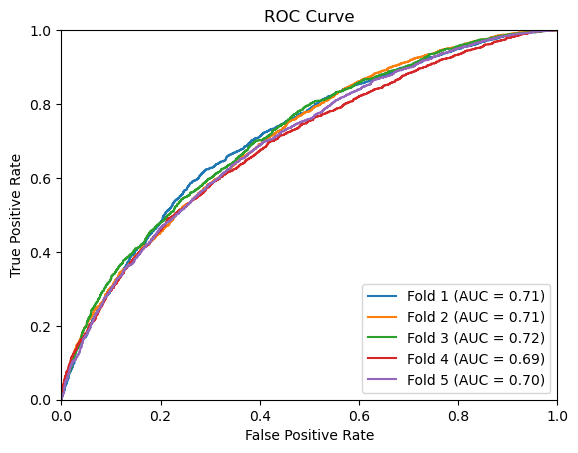

In [61]:
model_perform_dict = {
    "Fold 1": predictions[0],
    "Fold 2": predictions[1],
    "Fold 3": predictions[2],
    "Fold 4": predictions[3],
    "Fold 5": predictions[4],
}

evaluate.ROC_curve_of_cross_validation(answers, model_perform_dict)

### Following only for reformat error file contents

In [52]:
err_data = pd.read_csv(result_dir + "/raw.bak.csv", header=None)
err_data = err_data.to_numpy()
print(err_data.shape)

answers = []
predictions = []
for i, data in enumerate(err_data):
    print(len(data))
    if i % 2 == 0:
        # print(float(data[1][1]))
        
        answer = []
        for j in range(1, len(data)):
            if not isinstance(data[j], str):
                break
            answer.append(data[j][1])
        answers.append(answer)
    else:
        prediction = []
        for j in range(1, len(data)):
            if np.isnan(float(data[j])):
                break
            prediction.append(data[j])
        predictions.append(prediction)

for i in range(5):
    print(len(answers[i]), len(predictions[i]))

with open(result_dir + "/raw.new.csv", "w") as f:
    for i in range(len(answers)):
        f.write(f"{i+1},")
        f.write(",".join(answers[i]))
        f.write("\n")
        f.write(f"{i+1},")
        f.write(",".join([str(p) for p in predictions[i]]))
        f.write("\n")

(10, 5156)
5156
5156
5156
5156
5156
5156
5156
5156
5156
5156
5154 5154
5154 5154
5154 5154
5153 5153
5153 5153
